# HOW TO USE:

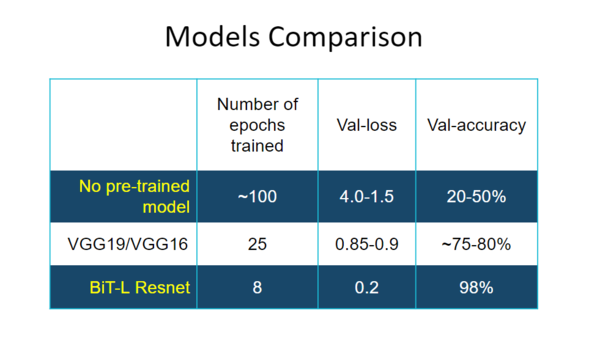

- Copy this [Folder](https://drive.google.com/drive/folders/1VwfjQMaLACjOm3rI57kNdy7Xa6TwiYxD?usp=sharing) to your Drive if you want to check out all three models: VanillaCNN+MLP;  VGG16&19;  BiT_Fined_grainedClassification


- This Colab will use BiT_Fined_grainedClassification (others models can be used similarly), you only have to save [this folder](https://drive.google.com/drive/folders/1R0-BCJynx_AUqFgNGB7LQzY1FqVXqHr0?usp=sharing) to your drive and then get the ***folder's address*** to later use in this colab. (Eg: '/content/drive/MyDrive/BiT_fine_grained-17Jun')

- Run all the cells below and follow the instructions at the Load Model section  
- Happy classifying flowers ;)

# IMPORT LIBRARIES AND DATASET

In [ ]:
#@title Libraries
import tensorflow as tf
import tensorflow_hub as hub

import tensorflow_datasets as tfds

import time

from PIL import Image
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

import os
import pathlib

In [ ]:
#@title Gradio
!pip install gradio --quiet
import gradio as gr

     |████████████████████████████████| 5.1 MB 4.3 MB/s 
     |████████████████████████████████| 212 kB 52.3 MB/s 
     |████████████████████████████████| 256 kB 57.9 MB/s 
     |████████████████████████████████| 140 kB 39.3 MB/s 
     |████████████████████████████████| 2.3 MB 32.0 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 57 kB 3.7 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 144 kB 40.6 MB/s 
     |████████████████████████████████| 271 kB 54.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 62 kB 969 kB/s 
     |████████████████████████████████| 856 kB 59.1 MB/s 
     |█████████████████████████

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
import tensorflow as tf


In [ ]:
#@title Use TensorFlow Datasets to load oxford_flowers102 dataset
import tensorflow_datasets as tfds

(train, val, test), info = tfds.load('oxford_flowers102', 
                                      split=['train', 'validation', 'test'],
                                      shuffle_files=True,
                                      as_supervised=True, 
                                      with_info=True)
NUM_CLASSES = 102


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQJJNES/oxford_flowers102-train.tfrecord


  0%|          | 0/1020 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQJJNES/oxford_flowers102-test.tfrecord


  0%|          | 0/6149 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQJJNES/oxford_flowers102-validation.tfrecord


  0%|          | 0/1020 [00:00<?, ? examples/s]

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [ ]:
#@title Save a text file list of flowers name
f = open("flower_names.txt", "w")
f.write(info.features['label'].names[0])

i=1
while i<102:
  f.write(" \n")
  f.write(info.features['label'].names[i])
  i+=1
f.close()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data_Preprocessing


In [ ]:
from tensorflow import cast, float32
from tensorflow.data.experimental import AUTOTUNE
from tensorflow import one_hot 
from tensorflow.image import resize

def preprocess_data(image, label):
  """
  Normalizes images: `uint8` -> `float32`.
  One hot encoding labels
  Resize to (224, 224)
  """


  return resize(cast(image, float32)/255. , [224, 224]), one_hot(label, 102)



# LOAD MODEL

In [ ]:
# Load a previously trained model for gradio demonstration

model2=tf.keras.models.load_model('your link here')

#Eg: model2=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BiT fine_grained-17Jun-20220617T065450Z-001/BiT fine_grained-17Jun')


# model can be found here: https://drive.google.com/drive/folders/1R0-BCJynx_AUqFgNGB7LQzY1FqVXqHr0?usp=sharing

In [ ]:
model2.summary()

Model: "my_bi_t_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  208998    
                                                                 
 keras_layer (KerasLayer)    multiple                  23500352  
                                                                 
Total params: 23,709,350
Trainable params: 208,998
Non-trainable params: 23,500,352
_________________________________________________________________


# GRADIO

In [ ]:
with open('/content/flower_names.txt') as f:
    labels = f.readlines()

In [ ]:
from numpy import exp
def softmax(vector):
 e = exp(vector)
 return e / e.sum()

In [ ]:
def image_to_output (input_img):

 


  gr_img=[]
  gr_img.append(input_img)
  img2=resize(cast(gr_img, float32)/255. , [224, 224])

  #print(img2)

  x_test=np.asarray(img2)

  prediction = model2.predict(x_test,batch_size=1).flatten()
  prediction=softmax(prediction)

  confidences = {labels[i]: float(prediction[i]) for i in range(102)}
#  confidences = {labels[i]:float(top[i]) for i in range(num_predictions)}

  return confidences




In [ ]:
import gradio as gr

UI=gr.Interface(fn=image_to_output, 
             inputs=gr.inputs.Image(shape=(224,224)),
             outputs=gr.outputs.Label(num_top_classes=5),
             interpretation="default"
             )

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


# LAUNCH USER INTERFACE

**Voilà, the User Interface was built.**

 Run the cell below to interact with the model or you can also use the URL created below so your friends can use it too ;) 

Text file containg names of flowers you can use to try out the model [here](https://drive.google.com/file/d/1dV97XD7I97KWqwml5b5qAMTHMJemew6A/view?usp=sharing)

In [ ]:
UI.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://29774.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f611af4bd10>,
 'http://127.0.0.1:7860/',
 'https://29774.gradio.app')